# Load Data

Data Definition

In [1]:
import pandas as pd 
import numpy as np 
import os 

In [27]:
INTERIM_DIRECTORIES = '../data/interim'

artists_path = os.path.join(INTERIM_DIRECTORIES,'interim_artists.csv')

In [28]:
artists_data = pd.read_csv(artists_path)

In [30]:
artists_data

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...
...,...,...,...,...
17627,18741,Diamanda Galás,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...
17628,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg
17629,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg
17630,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...


In [ ]:
INTERIM_DIRECTORIES = '../data/interim'

artists_path = os.path.join(INTERIM_DIRECTORIES,'interim_artists.csv')

In [29]:


artist_user_path = os.path.join(INTERIM_DIRECTORIES,'interim_user_artists.csv')

In [3]:
artist_user_df = pd.read_csv(artist_user_path)

In [4]:
artist_user_df.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [5]:
artist_user_df.shape

(92834, 3)

In [6]:
artist_user_df.dtypes

userID      int64
artistID    int64
weight      int64
dtype: object

In [7]:
artist_user_df.duplicated(subset=['userID','artistID']).sum()

0

In [8]:
def load_artist_user_data(filename) : 
    artist_user_path = os.path.join(INTERIM_DIRECTORIES,filename)
    artist_user_df = pd.read_csv(artist_user_path) 
    
    print('data shape',artist_user_df.shape)
    
    print('total duplicated data : ',artist_user_df.duplicated(subset=['userID','artistID']).sum())
    artist_user_df = artist_user_df.drop_duplicates(subset=['userID','artistID'])
    print('data shape after dropping duplicated data',artist_user_df.shape)
    
    print('Data Dtypes: \n ',artist_user_df.dtypes)
    return artist_user_df

In [9]:
artist_data = 'interim_user_artists.csv'
artist_user_df = load_artist_user_data(filename=artist_data)

data shape (92834, 3)
total duplicated data :  0
data shape after dropping duplicated data (92834, 3)
Data Dtypes: 
  userID      int64
artistID    int64
weight      int64
dtype: object


In [10]:
artist_user_df.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


# Exploratory Data Analysis / Non Personalized Recommendation

## Finding Number of UserID and ArtistID

In [11]:
print('Number of UserID :  \n',artist_user_df.userID.nunique())
print('Number of artistID :  \n',artist_user_df.artistID.nunique())

Number of UserID :  
 1892
Number of artistID :  
 17632


## Finding Most Played Artist

to find most played artist we need to find count value of each artistID weight, after that we sort by highest played, and then take top 10 most played artists

In [12]:
artist_play_total = (artist_user_df
                     .groupby('artistID',as_index=False)
                     .agg(play_count=pd.NamedAgg(column='weight',aggfunc='sum'))
                     .sort_values('play_count',ascending=False)
                     .head(10))
artist_play_total.head()

,artistID,play_count
283,289,2393140
66,72,1301308
83,89,1291387
286,292,1058405
492,498,963449


Previously we have already sorted which artist that music played the most. However it still in `artistID`. We have to load artist metadata

In [13]:
filename = 'interim_artists.csv'
artist_data_path  = os.path.join(INTERIM_DIRECTORIES,filename)

In [14]:
artist_df = pd.read_csv(artist_data_path)
artist_df.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [15]:
artist_df.shape

(17632, 4)

In [16]:
artist_df.duplicated().sum()

0

In [17]:
artist_df.dtypes

id             int64
name          object
url           object
pictureURL    object
dtype: object

Create a function to load artist data

In [18]:
def load_artist_data(filename) : 
    artist_data_path  = os.path.join(INTERIM_DIRECTORIES,filename)
    artist_df = pd.read_csv(artist_data_path,usecols=['id','name'])
    print('Glimpse of data \n : ',artist_df.head())
    
    print('data shape',artist_df.shape)
    
    print('total duplicated data : ',artist_df.duplicated().sum())
    artist_df = artist_df.drop_duplicates()
    print('data shape after dropping duplicated data',artist_df.shape)
    
    print('Data Dtypes: \n ',artist_df.dtypes)
    return artist_df

In [19]:
artist_df = load_artist_data('interim_artists.csv')

Glimpse of data 
 :     id               name
0   1       MALICE MIZER
1   2    Diary of Dreams
2   3  Carpathian Forest
3   4       Moi dix Mois
4   5        Bella Morte
data shape (17632, 2)
total duplicated data :  0
data shape after dropping duplicated data (17632, 2)
Data Dtypes: 
  id       int64
name    object
dtype: object


after loading the artist metadata we `merge` between   `artist_df` and `artist_play_total` on `id` (`artist_df`) and `artistID` (`artist_play_total`)

In [20]:
artist_play_top10 = artist_play_total.merge(artist_df,left_on='artistID',right_on='id')
artist_play_top10.head()

,artistID,play_count,id,name
0,289,2393140,289,Britney Spears
1,72,1301308,72,Depeche Mode
2,89,1291387,89,Lady Gaga
3,292,1058405,292,Christina Aguilera
4,498,963449,498,Paramore


we see that `id` and `artistID` refer to artistID. we will dropdown the `id` column

In [21]:
artist_play_top10 = artist_play_top10.drop('id',axis=1)
artist_play_top10

,artistID,play_count,name
0,289,2393140,Britney Spears
1,72,1301308,Depeche Mode
2,89,1291387,Lady Gaga
3,292,1058405,Christina Aguilera
4,498,963449,Paramore
5,67,921198,Madonna
6,288,905423,Rihanna
7,701,688529,Shakira
8,227,662116,The Beatles
9,300,532545,Katy Perry


Now, we are going to visualize which Top 10 artist that have the most played songs

Text(0.5, 1.0, 'Top 10 Most Played Artist')

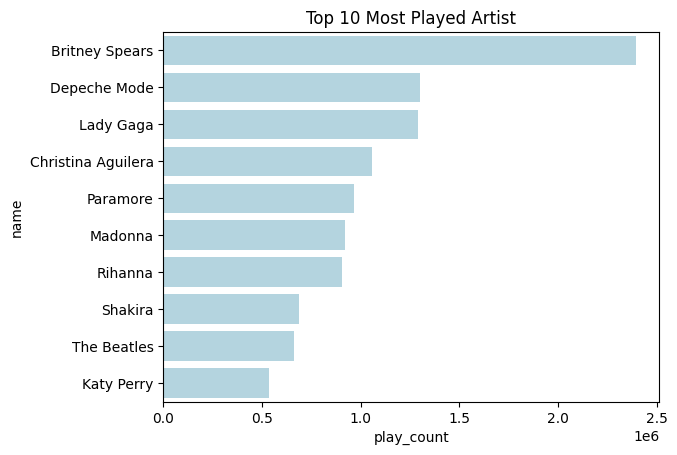

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt 


sns.barplot(data=artist_play_top10,x='play_count',y='name',color='lightblue')
plt.title('Top 10 Most Played Artist')


In [26]:
artist_user_df.artistID.nunique()

17632